In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db=mysql.connector.connect(host="localhost",
                          username="root",
                          password="Qandeel_121212",
                          database="ecommerce")
cur=db.cursor()

# 1) List all unique cities where customers are located.

In [90]:

query = "SELECT DISTINCT customer_city FROM customers;"
cur.execute(query)

# Fetch all results from the executed query
data = cur.fetchall()

# Print or return the data
df=pd.DataFrame(data)
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db=mysql.connector.connect(host="localhost",
                          username="root",
                          password="Qandeel_121212",
                          database="ecommerce")
cur=db.cursor()

query = "SELECT COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017;"
cur.execute(query)

# Fetch the result from the executed query
data = cur.fetchall()

# Print the result
print("Total orders placed in 2017 are:", data[0][0])


Total orders placed in 2017 are: 90202


# 3. Find the total sales per category.

In [10]:
query = """
SELECT 
    products.product_category AS category, 
    ROUND(SUM(payments.payment_value), 2) AS sales
FROM 
    products 
JOIN 
    order_items ON products.product_id = order_items.product_id
JOIN 
    payments ON payments.order_id = order_items.order_id
GROUP BY 
    category;
"""
cur.execute(query)

# Fetch the result from the executed query
data = cur.fetchall()
df=pd.DataFrame(data, columns= ["Category","Sales"])
# Print the result
print(df)


                       Category       Sales
0                     perfumery  1013477.32
1          Furniture Decoration  2860352.78
2                     telephony   973764.10
3                bed table bath  3425107.34
4                    automotive  1704588.66
..                          ...         ...
69               cds music dvds     2398.86
70                   La Cuisine     5827.06
71  Fashion Children's Clothing     1571.34
72                     PC Gamer     4348.86
73       insurance and services      649.02

[74 rows x 2 columns]


# 4. Calculate the percentage of orders that were paid in installments.

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db=mysql.connector.connect(host="localhost",
                          username="root",
                          password="Qandeel_121212",
                          database="ecommerce")
cur=db.cursor()
query = """
SELECT
(sum(case WHEN payment_installments >=1 then 1 
else 0 end))/count(*)*100 FROM payments

"""
cur.execute(query)

# Fetch the result from the executed query
data = cur.fetchall()

# Print the result
print(data)

[(Decimal('99.9981'),)]


# 5. Count the number of customers from each state. 

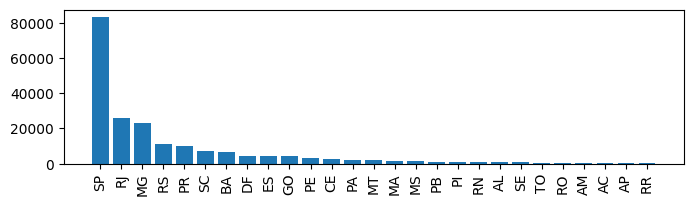

In [16]:
query = """
SELECT customer_state, COUNT(customer_id)
FROM customers group by customer_state
"""
cur.execute(query)

# Fetch the result from the executed query
data = cur.fetchall()
df=pd.DataFrame(data, columns=['State','Customer_count'])
df=df.sort_values(by='Customer_count',ascending=False)
plt.figure(figsize=(8,2))
plt.bar (df['State'], df['Customer_count'])
plt.xticks(rotation=90)
plt.show()

# 1. Calculate the number of orders per month in 2018.

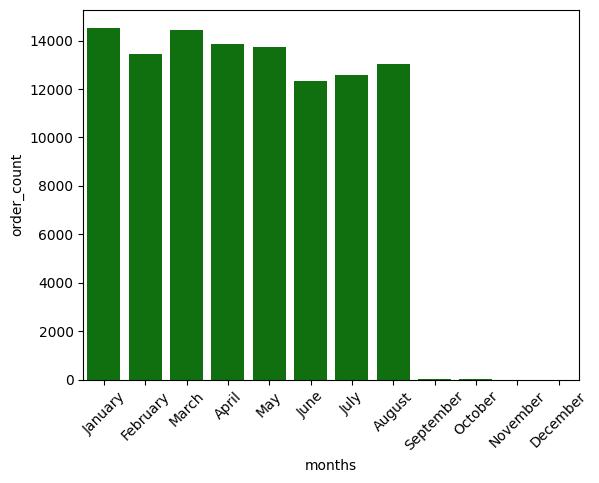

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Database connection setup
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Qandeel_121212",
    database="ecommerce"
)

cur = db.cursor()

# Query to fetch order counts by month for 2018
query = """
SELECT MONTH(order_purchase_timestamp) AS month, 
       COUNT(order_id) AS order_count
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY month
"""

cur.execute(query)
data = cur.fetchall()

# Convert the result into a pandas DataFrame
df = pd.DataFrame(data, columns=["months", "order_count"])


df['months'] = df['months'].apply(lambda x: 
    ["January", "February", "March", "April", "May", "June", "July", 
     "August", "September", "October", "November", "December"][x-1])

sns.barplot(x='months', y='order_count', data=df, order=[
    "January", "February", "March", "April", "May", "June", "July", 
    "August", "September", "October", "November", "December"],color="green")

plt.xticks(rotation=45)

plt.show()



# 2. Find the average number of products per order, grouped by customer city.

In [47]:
 import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db=mysql.connector.connect(host="localhost",
                          username="root",
                          password="Qandeel_121212",
                          database="ecommerce")
cur=db.cursor()
query = """
WITH count_per_order as 
(SELECT orders.order_id, orders.customer_id,count(order_items.order_id) as OC
FROM orders JOIN order_items
on orders.order_id=order_items.order_id
Group by orders.order_id,orders.customer_id)

SELECT customers.customer_city, round (avg(count_per_order.oc),2)
FROM customers join count_per_order
on customers.customer_id=count_per_order.customer_id
Group by customers.customer_city 
"""
cur.execute(query)

# Fetch the result from the executed query
data = cur.fetchall()
df=pd.DataFrame(data,columns=["Customers city","avg Orders"])
df.head(10)
print(df)

           Customers city avg Orders
0            treze tilias       2.55
1                 indaial       2.23
2     sao jose dos campos       2.28
3               sao paulo       2.31
4            porto alegre       2.35
...                   ...        ...
4105         tibau do sul       2.00
4106           sao mamede       2.00
4107             guairaca       4.00
4108             sambaiba       2.00
4109           japaratuba       2.00

[4110 rows x 2 columns]


# 3. Calculate the percentage of total revenue contributed by each product category.

In [38]:
query = """
SELECT 
    products.product_category AS category, 
    (SUM(payments.payment_value)/(SELECT sum(payment_value) from payments))*100 AS sales_percentage
FROM 
    products 
JOIN 
    order_items ON products.product_id = order_items.product_id
JOIN 
    payments ON payments.order_id = order_items.order_id
GROUP BY 
    category order by sales_percentage desc;

"""
cur.execute(query)

# Fetch the result from the executed query
data = cur.fetchall()
df=pd.DataFrame(data, columns= ["Category","percentage_distribution"])
# Print the result
print(df.head(5))

               Category  percentage_distribution
0        bed table bath                21.395057
1         HEALTH BEAUTY                20.705683
2  computer accessories                19.805648
3  Furniture Decoration                17.867297
4       Watches present                17.855308


# 4. Identify the correlation between product price and the number of times a product has been purchased.

In [49]:
import numpy as np
query = """
SELECT 
    products.product_category,
    count(order_items.product_id),
    round(avg(order_items.price),2)
    FROM products join order_items
    on products.product_id=order_items.product_id
    group by  products.product_category
"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns= ["Category","order_count","price"])
# Print the result
print(df)
arr1=df["order_count"]
arr2=df["price"]
a=np.corrcoef([arr1,arr2])
print("corelation b/w product price and the number of times a product has been purchased: ",a[0][1])

                           Category  order_count   price
0                     HEALTH BEAUTY        19340  130.16
1                     sport leisure        17282  114.34
2                        Cool Stuff         7592  167.36
3              computer accessories        15654  116.51
4                   Watches present        11982  201.14
..                              ...          ...     ...
69                          flowers           66   33.64
70  Kitchen portable and food coach           30  264.57
71       CITTE AND UPHACK FURNITURE           76  114.95
72                  House Comfort 2           60   25.34
73                   cds music dvds           28   52.14

[74 rows x 3 columns]
corelation b/w product price and the number of times a product has been purchased:  -0.10631514167157562


# 5. Calculate the total revenue generated by each seller, and rank them by revenue.

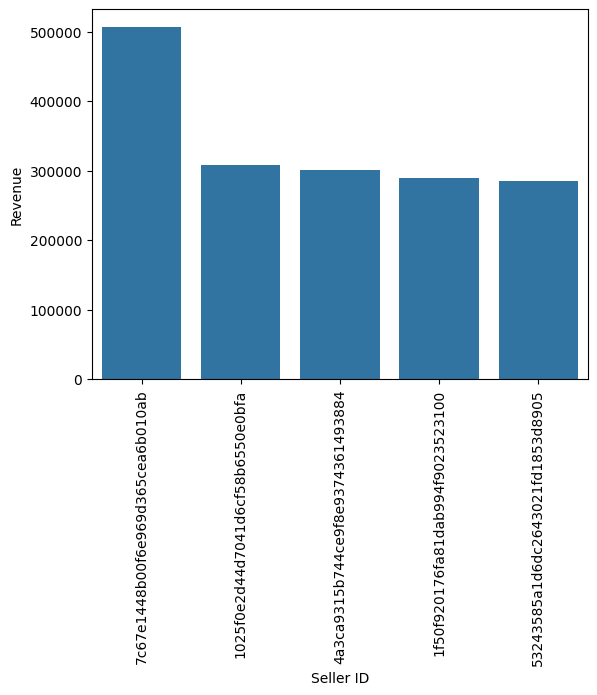

In [55]:
query = """
SELECT * , dense_rank()over(order by revenue desc) as rn FROM
(SELECT 
   order_items.seller_id, sum(payments.payment_value)revenue
   FROM order_items join payments
   on order_items.order_id=payments.order_id
   group by order_items.seller_id) as A
"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=['Seller ID','Revenue','Rank'])
df=df.head(5)
sns.barplot(x='Seller ID',y="Revenue",data=df)
plt.xticks(rotation=90)
plt.show()

# ADVANCE QURIES

# 1. Calculate the moving average of order values for each customer over their order history.

In [63]:
query = """
SELECT customer_id, 
       order_purchase_timestamp,
       AVG(payment) OVER (PARTITION BY customer_id 
                          ORDER BY order_purchase_timestamp 
                          ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS mov_avg
FROM (
    SELECT orders.customer_id,
           orders.order_purchase_timestamp,
           payments.payment_value AS payment
    FROM payments
    JOIN orders ON payments.order_id = orders.order_id
) AS a;

"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=['customer ID','Date','moving average'])
df

,customer ID,Date,moving average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
2,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
4,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.419998
...,...,...,...
207767,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.130005
207768,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000
207769,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000
207770,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001


# 2. Calculate the cumulative sales per month for each year.

In [80]:
query = """
SELECT years, months, payments, sum(payments)
over (order by years , months) comulative_sales 
FROM  
(SELECT year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2)as payments
FROM orders join payments
on orders.order_id=payments.order_id
group by years,months order by years,months) As A
"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=['Years','Months','Sales','comulative_sales'])
df

,Years,Months,Sales,comulative_sales
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78
5,2017,3,899727.20,1879243.98
6,2017,4,835576.06,2714820.04
7,2017,5,1185837.64,3900657.68
8,2017,6,1022552.76,4923210.44
9,2017,7,1184765.84,6107976.28


# 3. Calculate the year-over-year growth rate of total sales.

In [82]:
query = """
with a as (SELECT year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2)as payment
FROM orders join payments
on orders.order_id=payments.order_id
group by years order by years)
SELECT years, ((payment-lag(payment,1) over(order by years))/lag(payment,1) over(order by years))* 100 FROM a
"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=['Years','yoy % grwth'])
df

,Years,yoy % grwth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [87]:
query = """
WITH a AS (
    SELECT customers.customer_id,
           MIN(orders.order_purchase_timestamp) AS first_order
    FROM customers 
    JOIN orders ON customers.customer_id = orders.customer_id
    GROUP BY customers.customer_id),

b AS (
    SELECT a.customer_id, 
           COUNT(DISTINCT orders.order_purchase_timestamp) AS order_count
    FROM a 
    JOIN orders 
    ON orders.customer_id = a.customer_id
    AND orders.order_purchase_timestamp > a.first_order
    AND orders.order_purchase_timestamp < DATE_ADD(a.first_order, INTERVAL 6 MONTH)
    GROUP BY a.customer_id)
    
SELECT 100 * (COUNT(DISTINCT b.customer_id) / COUNT(DISTINCT a.customer_id)) AS percentage
FROM a 
LEFT JOIN b ON a.customer_id = b.customer_id;


"""
cur.execute(query)
data = cur.fetchall()
data

[(Decimal('0.0000'),)]

# 5. Identify the top 3 customers who spent the most money in each year.

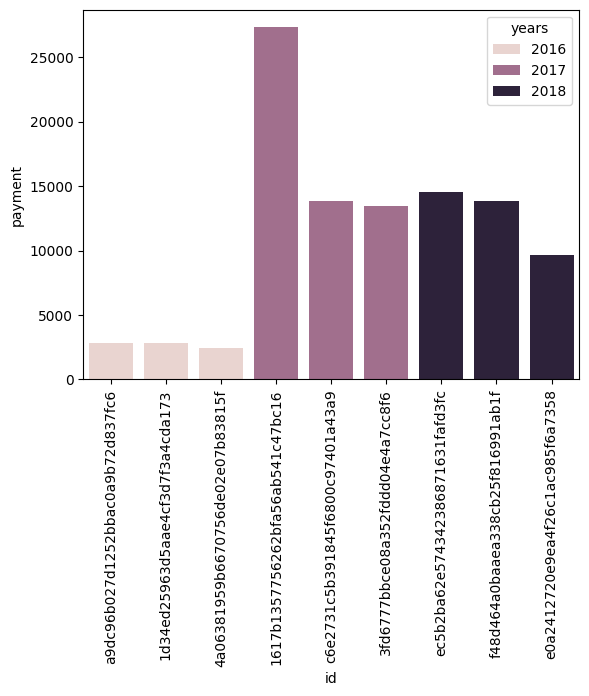

In [107]:
query = """

SELECT years, customer_id,payment,d_rank
from
(SELECT 
    YEAR(orders.order_purchase_timestamp) AS years,
    orders.customer_id,
    SUM(payments.payment_value) AS payment,
    DENSE_RANK() OVER (
        PARTITION BY YEAR(orders.order_purchase_timestamp)
        ORDER BY SUM(payments.payment_value) DESC
    ) AS d_rank
FROM 
    orders 
JOIN 
    payments 
ON 
    payments.order_id = orders.order_id
GROUP BY 
    YEAR(orders.order_purchase_timestamp), 
    orders.customer_id)as a
    where d_rank<=3

"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=['years','id','payment','rank'])
sns.barplot(x='id',y='payment',data=df,hue='years')
plt.xticks(rotation=90)
plt.show()